In [339]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn.pipeline import make_pipeline

In [194]:
ccm_analytics= pd.read_csv('CCM_Analytics.csv')
ccm_analytics.head()

,DateOfGame,Opponent,TotalPoint,FirstHalfPoint,FirstHalfFieldGoalAttempts,FirstHalfFieldGoalsMade,SecondHalfPoint,SecondHalfFieldGoalAttempts,SecondHalfFieldGoalsMade,FreeThrowsAttemptedFirstHalf,...,PointsPerAttemptGuardedTotal,2PointFieldGoal-PointsPerAttemptTotal,3PointFieldGoals-PointsPerAttemptTotal,2PointFieldGoalOpen-PointsPerAttemptsTotal,2PointFieldGoalGuarded-PointsPerAttemptTotal,3PointFieldGoalOpen-PointPerAttemptTotal,3PointFieldGoalGuarde -PointPerAttemptTotal,Assists,KaukaunaPointsScored,WinOrLoss
0,1/19/2021,GB SouthWest,26,11,6,3,15,9,6,2,...,1.166667,1.666667,1.333333,2,1.600000,3.000000,0.857143,6,93,Win
1,1/22/2021,Hortonville,8,7,6,0,1,6,2,2,...,0.222222,0.400000,0.428571,0,0.500000,1.500000,0.000000,7,96,Win
2,1/23/2021,Appleton West,25,15,12,5,10,6,3,0,...,1.000000,0.500000,1.615385,#DIV/0!,0.500000,1.714286,1.285714,11,99,Win
3,12/8/2020,Appleton East,40,10,10,4,30,12,8,2,...,1.210526,1.294118,0.600000,2,1.250000,0.000000,1.000000,6,86,Win
4,1/29/2021,Kimberly,20,10,8,3,10,11,4,2,...,0.666667,0.800000,1.000000,0,0.888889,1.500000,0.000000,6,65,Loss


In [195]:
# Check to see if any columns do not have a value 
ccm_analytics.isna().sum()

DateOfGame                                      0
Opponent                                        0
TotalPoint                                      0
FirstHalfPoint                                  0
FirstHalfFieldGoalAttempts                      0
FirstHalfFieldGoalsMade                         0
SecondHalfPoint                                 0
SecondHalfFieldGoalAttempts                     0
SecondHalfFieldGoalsMade                        0
FreeThrowsAttemptedFirstHalf                    0
FreeThrowsMadeFirstHalf                         0
FreeThrowsAttemptedSecondHalf                   0
FreeThrowsMadeSecondHalf                        0
FreeThrowsAttemptedTotal                        0
FreeThrowsMadeTotal                             0
FieldGoalsAttemptedTotal                        0
FieldGoalsMadeTotal                             0
2PointFieldGoalsAttemptedTotal                  0
2PointFieldGoalsMadeTotal                       0
3PointFieldGoalsAttemptedTotal                  0


In [196]:
# Checking to see if any are null
ccm_analytics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 47 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   DateOfGame                                    5 non-null      object 
 1   Opponent                                      5 non-null      object 
 2   TotalPoint                                    5 non-null      int64  
 3   FirstHalfPoint                                5 non-null      int64  
 4   FirstHalfFieldGoalAttempts                    5 non-null      int64  
 5   FirstHalfFieldGoalsMade                       5 non-null      int64  
 6   SecondHalfPoint                               5 non-null      int64  
 7   SecondHalfFieldGoalAttempts                   5 non-null      int64  
 8   SecondHalfFieldGoalsMade                      5 non-null      int64  
 9   FreeThrowsAttemptedFirstHalf                  5 non-null      int64  

In [197]:
#Replace #DIV/0! error with 0 (Cleaning data)
ccm_analytics = ccm_analytics.replace('#DIV/0!', 0)

In [198]:
# Get the names of all the columns
ccm_analytics.describe().columns

Index(['TotalPoint', 'FirstHalfPoint', 'FirstHalfFieldGoalAttempts',
       'FirstHalfFieldGoalsMade', 'SecondHalfPoint',
       'SecondHalfFieldGoalAttempts', 'SecondHalfFieldGoalsMade',
       'FreeThrowsAttemptedFirstHalf', 'FreeThrowsMadeFirstHalf',
       'FreeThrowsAttemptedSecondHalf', 'FreeThrowsMadeSecondHalf',
       'FreeThrowsAttemptedTotal', 'FreeThrowsMadeTotal',
       'FieldGoalsAttemptedTotal', 'FieldGoalsMadeTotal',
       '2PointFieldGoalsAttemptedTotal', '2PointFieldGoalsMadeTotal',
       '3PointFieldGoalsAttemptedTotal', '3PointFieldGoalsMadeTotal',
       'FieldGoalsAttemptedOpenTotal', 'FieldGoalsMadeOpenTotal',
       'FieldGoalsAttemptedGuardedTotal', 'FieldGoalsMadeGuardedTotal',
       '2PointFieldGoalsAttemptedOpenTotal', '2PointFieldGoalsMadeOpenTotal',
       '2PointFieldGoalsAttemptedGuardedTotal',
       '2PointFieldGoalsMadeGuardedTotal ',
       '3PointFieldGoalsAttemptedOpenTotal', '3PointFieldGoalsMadeOpenTotal',
       '3PointFieldGoalsAttemptetGua

In [199]:
# Seperate Numerical and Categorical data
df_num = ccm_analytics.drop(columns = ['DateOfGame', 'Opponent', 'WinOrLoss'])
df_num

,TotalPoint,FirstHalfPoint,FirstHalfFieldGoalAttempts,FirstHalfFieldGoalsMade,SecondHalfPoint,SecondHalfFieldGoalAttempts,SecondHalfFieldGoalsMade,FreeThrowsAttemptedFirstHalf,FreeThrowsMadeFirstHalf,FreeThrowsAttemptedSecondHalf,...,PointsPerAttemptOpenTotal,PointsPerAttemptGuardedTotal,2PointFieldGoal-PointsPerAttemptTotal,3PointFieldGoals-PointsPerAttemptTotal,2PointFieldGoalOpen-PointsPerAttemptsTotal,2PointFieldGoalGuarded-PointsPerAttemptTotal,3PointFieldGoalOpen-PointPerAttemptTotal,3PointFieldGoalGuarde -PointPerAttemptTotal,Assists,KaukaunaPointsScored
0,26,11,6,3,15,9,6,2,2,2,...,2.666667,1.166667,1.666667,1.333333,2,1.600000,3.000000,0.857143,6,93
1,8,7,6,0,1,6,2,2,2,2,...,1.000000,0.222222,0.400000,0.428571,0,0.500000,1.500000,0.000000,7,96
2,25,15,12,5,10,6,3,0,0,3,...,1.714286,1.000000,0.500000,1.615385,0,0.500000,1.714286,1.285714,11,99
3,40,10,10,4,30,12,8,2,2,13,...,0.666667,1.210526,1.294118,0.600000,2,1.250000,0.000000,1.000000,6,86
4,20,10,8,3,10,11,4,2,2,1,...,1.285714,0.666667,0.800000,1.000000,0,0.888889,1.500000,0.000000,6,65


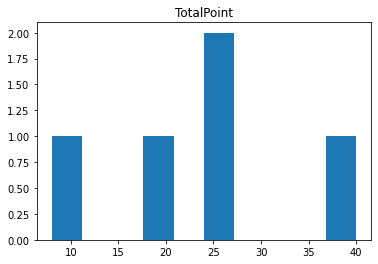

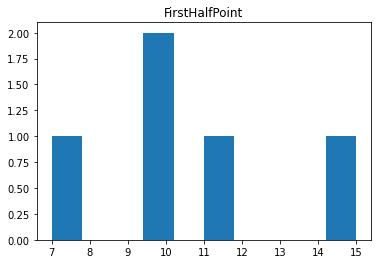

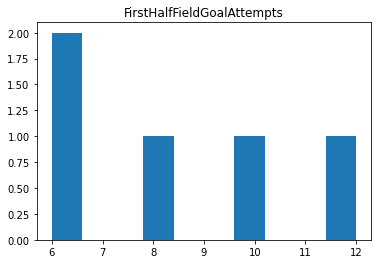

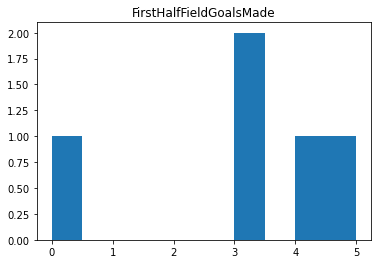

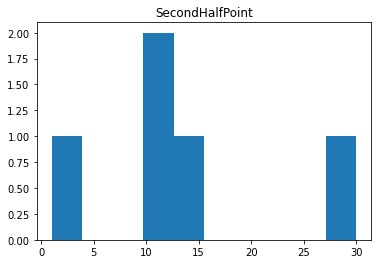

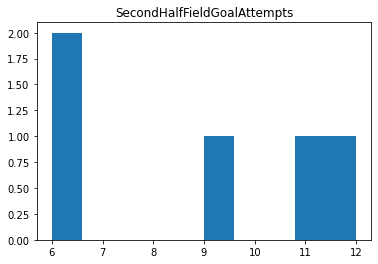

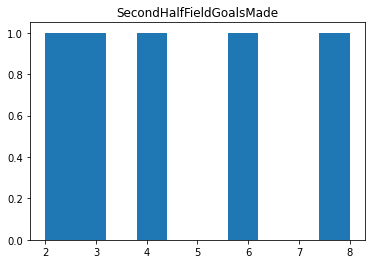

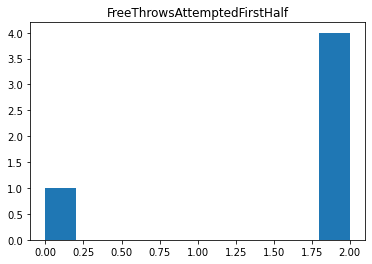

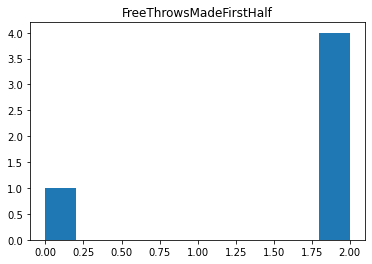

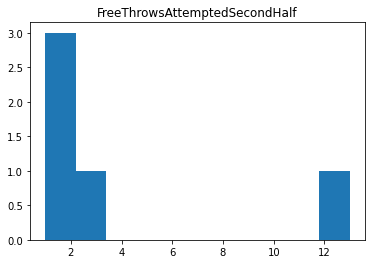

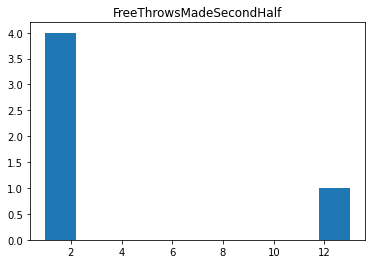

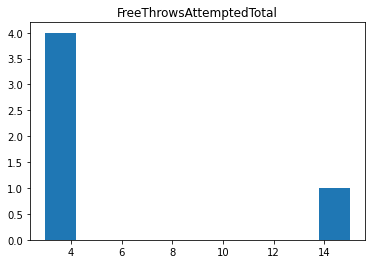

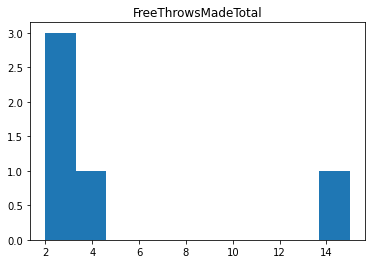

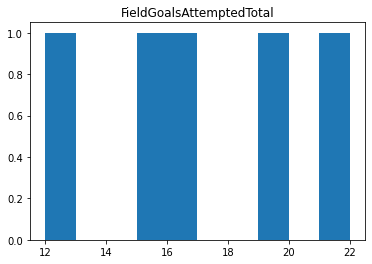

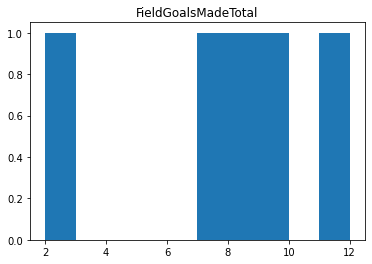

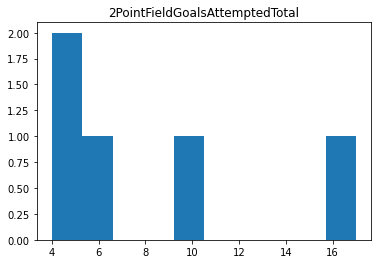

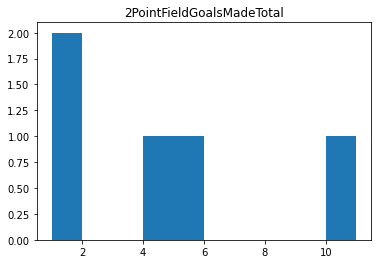

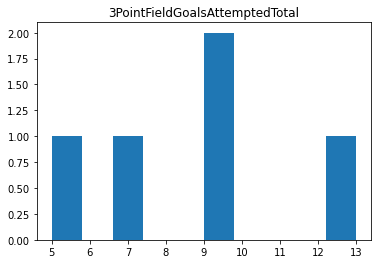

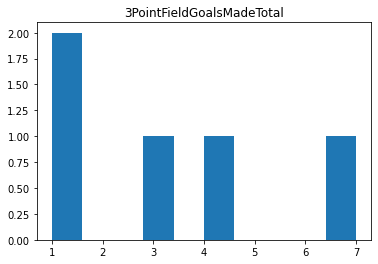

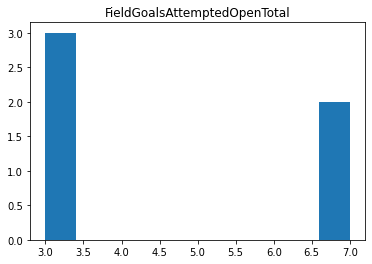

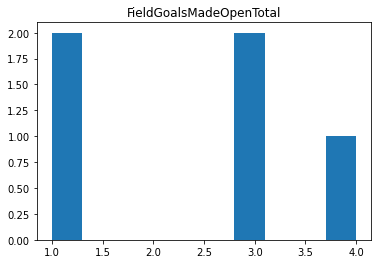

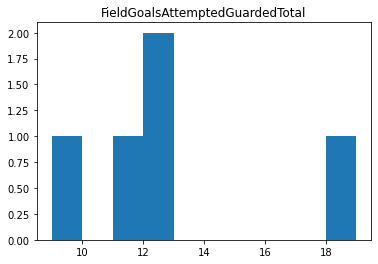

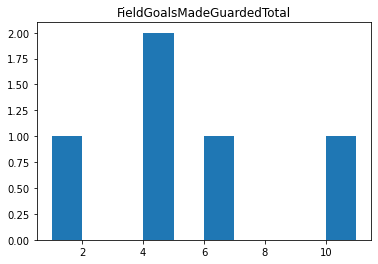

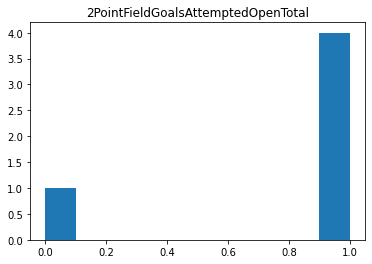

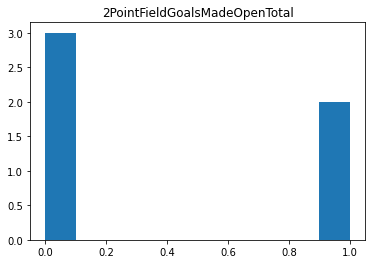

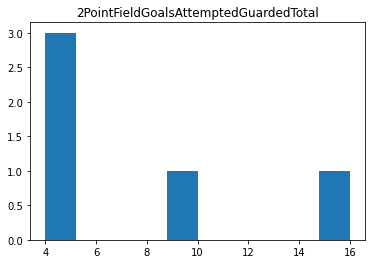

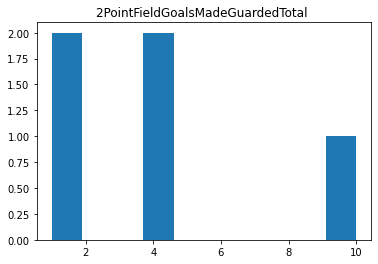

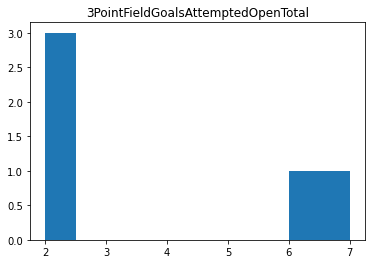

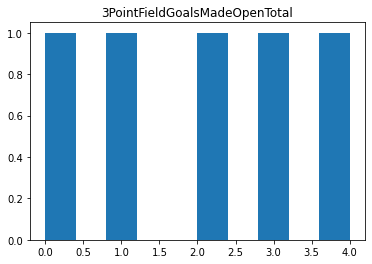

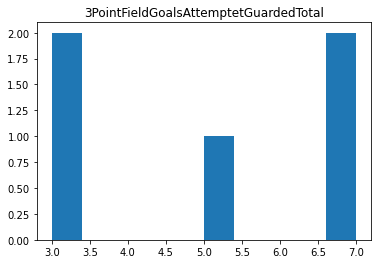

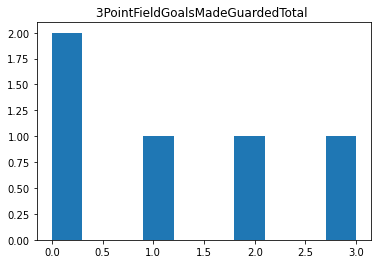

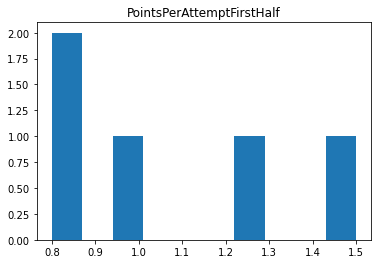

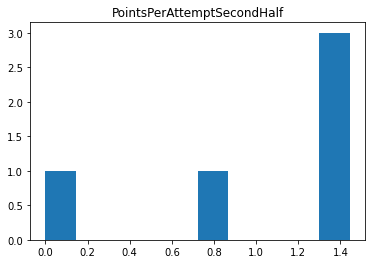

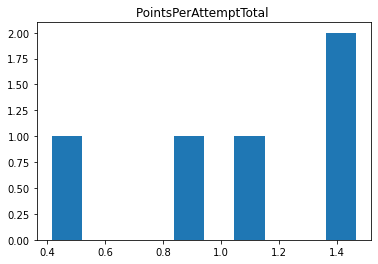

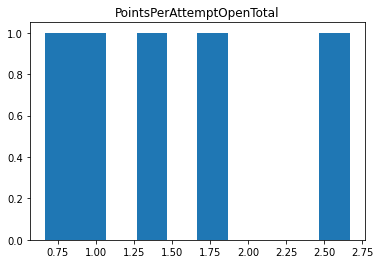

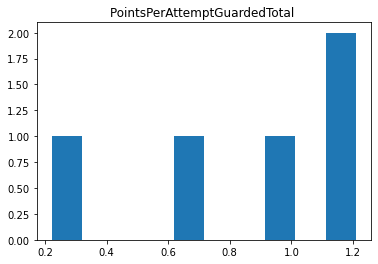

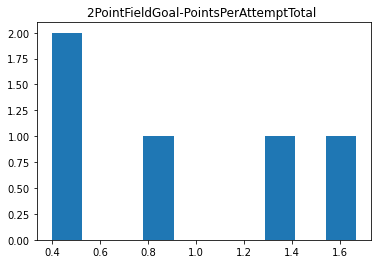

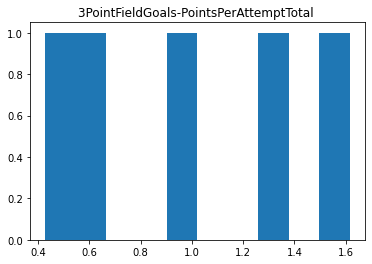

TypeError: 'value' must be an instance of str or bytes, not a int

In [200]:
# See distributions for numeric values 
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

array([[<AxesSubplot:xlabel='TotalPoint', ylabel='TotalPoint'>,
        <AxesSubplot:xlabel='FirstHalfPoint', ylabel='TotalPoint'>],
       [<AxesSubplot:xlabel='TotalPoint', ylabel='FirstHalfPoint'>,
        <AxesSubplot:xlabel='FirstHalfPoint', ylabel='FirstHalfPoint'>]],
      dtype=object)

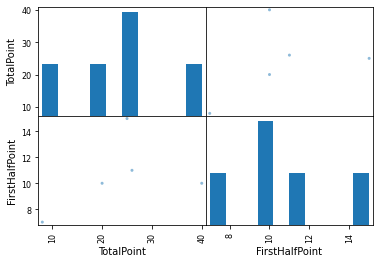

In [38]:
#Scatter Plots
pd.plotting.scatter_matrix(df_num[['TotalPoint', 'FirstHalfPoint']])

<AxesSubplot:>

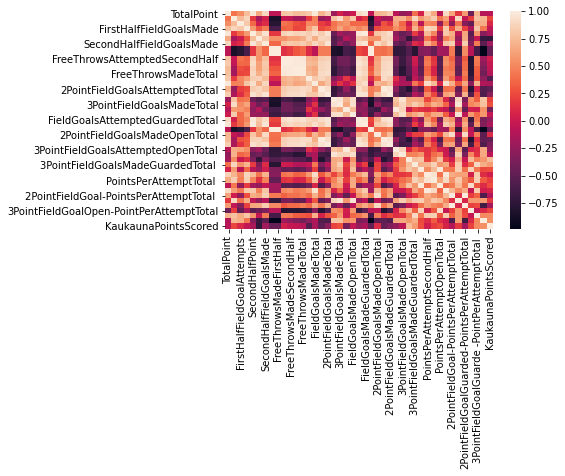

In [39]:
#Heat map correlations
shooting_correlation = df_num.corr()
sns.heatmap(shooting_correlation)

In [40]:
#Find correlations
shooting_correlation

,TotalPoint,FirstHalfPoint,FirstHalfFieldGoalAttempts,FirstHalfFieldGoalsMade,SecondHalfPoint,SecondHalfFieldGoalAttempts,SecondHalfFieldGoalsMade,FreeThrowsAttemptedFirstHalf,FreeThrowsMadeFirstHalf,FreeThrowsAttemptedSecondHalf,...,PointsPerAttemptTotal,PointsPerAttemptOpenTotal,PointsPerAttemptGuardedTotal,2PointFieldGoal-PointsPerAttemptTotal,3PointFieldGoals-PointsPerAttemptTotal,2PointFieldGoalGuarded-PointsPerAttemptTotal,3PointFieldGoalOpen-PointPerAttemptTotal,3PointFieldGoalGuarde -PointPerAttemptTotal,Assists,KaukaunaPointsScored
TotalPoint,1.000000,0.418046,5.349575e-01,0.764184,0.969411,0.661970,0.895846,-0.058124,-0.058124,0.798482,...,0.667267,-0.054958,0.910325,0.638984,0.176281,0.590952,-0.421905,0.715569,-0.097919,-0.075028
FirstHalfPoint,0.418046,1.000000,7.587197e-01,0.881293,0.182292,-0.168869,0.043238,-0.853766,-0.853766,-0.027937,...,0.837849,0.430706,0.618645,0.027450,0.902530,-0.044000,0.199048,0.788623,0.736495,0.233064
FirstHalfFieldGoalAttempts,0.534958,0.758720,1.000000e+00,0.819920,0.374023,0.013820,0.111463,-0.771744,-0.771744,0.416669,...,0.466975,-0.257405,0.450216,-0.251137,0.416612,-0.318749,-0.470681,0.673047,0.689860,0.101308
FirstHalfFieldGoalsMade,0.764184,0.881293,8.199201e-01,1.000000,0.589011,0.288943,0.443897,-0.597614,-0.597614,0.349543,...,0.849706,0.189269,0.824214,0.271743,0.688423,0.208842,-0.134440,0.803199,0.431474,-0.039225
SecondHalfPoint,0.969411,0.182292,3.740233e-01,0.589011,1.000000,0.762116,0.957946,0.167762,0.167762,0.871793,...,0.495850,-0.175854,0.818152,0.684195,-0.053049,0.651511,-0.510433,0.561431,-0.304972,-0.144178
SecondHalfFieldGoalAttempts,0.661970,-0.168869,1.381975e-02,0.288943,0.762116,1.000000,0.808043,0.564076,0.564076,0.547461,...,0.146560,-0.245223,0.469969,0.621991,-0.243718,0.652484,-0.431443,-0.034657,-0.698160,-0.721957
SecondHalfFieldGoalsMade,0.895846,0.043238,1.114627e-01,0.443897,0.957946,0.808043,1.000000,0.371391,0.371391,0.760289,...,0.477308,-0.015342,0.798198,0.851492,-0.082418,0.834236,-0.325838,0.444245,-0.507555,-0.185870
FreeThrowsAttemptedFirstHalf,-0.058124,-0.853766,-7.717436e-01,-0.597614,0.167762,0.564076,0.371391,1.000000,1.000000,0.134976,...,-0.472568,-0.179008,-0.198950,0.449008,-0.701484,0.521601,-0.089984,-0.618244,-0.979850,-0.459449
FreeThrowsMadeFirstHalf,-0.058124,-0.853766,-7.717436e-01,-0.597614,0.167762,0.564076,0.371391,1.000000,1.000000,0.134976,...,-0.472568,-0.179008,-0.198950,0.449008,-0.701484,0.521601,-0.089984,-0.618244,-0.979850,-0.459449
FreeThrowsAttemptedSecondHalf,0.798482,-0.027937,4.166687e-01,0.349543,0.871793,0.547461,0.760289,0.134976,0.134976,1.000000,...,0.146935,-0.544572,0.520024,0.344201,-0.380272,0.307704,-0.791498,0.454733,-0.190264,0.052417


In [41]:
#Pivot table to see assits and point spread in first and second half
pd.pivot_table(ccm_analytics, index = 'TotalPoint', values = ['Assists', 'FirstHalfPoint', 'SecondHalfPoint'])

,Assists,FirstHalfPoint,SecondHalfPoint
TotalPoint,,,
8,7,7,1
20,6,10,10
25,11,15,10
26,6,11,15
40,6,10,30


In [42]:
# Going to machine learn to predict total points based on first half stats
y = ccm_analytics.TotalPoint
y


0    26
1     8
2    25
3    40
4    20
Name: TotalPoint, dtype: int64

In [135]:
# What to use from data to predict total points
ccm_features= ['FirstHalfPoint', 'FirstHalfFieldGoalAttempts', 'FreeThrowsAttemptedFirstHalf', 'PointsPerAttemptFirstHalf']


In [137]:
# Look at data to be used in prediction
X = ccm_analytics[ccm_features]
X.describe()

,FirstHalfPoint,FirstHalfFieldGoalAttempts,FreeThrowsAttemptedFirstHalf,PointsPerAttemptFirstHalf
count,5.000000,5.000000,5.000000,5.000000
mean,10.600000,8.400000,1.600000,1.076667
std,2.880972,2.607681,0.894427,0.296179
min,7.000000,6.000000,0.000000,0.800000
25%,10.000000,6.000000,2.000000,0.833333
50%,10.000000,8.000000,2.000000,1.000000
75%,11.000000,10.000000,2.000000,1.250000
max,15.000000,12.000000,2.000000,1.500000


In [45]:
# Look at first 5 values of prediction values
X.head()

,FirstHalfPoint,FirstHalfFieldGoalAttempts,FreeThrowsAttemptedFirstHalf,PointsPerAttemptFirstHalf
0,11,6,2,1.500000
1,7,6,2,0.833333
2,15,12,0,1.250000
3,10,10,2,0.800000
4,10,8,2,1.000000


In [285]:
# Used Decision Tree Regressor to split prediction values
from sklearn.tree import DecisionTreeRegressor
ccm_model = DecisionTreeRegressor(random_state = 0)
ccm_model.fit(X, y)

DecisionTreeRegressor(random_state=0)

In [286]:
print("Making predictions for the following 5 games:")
print(X.head())
print("The predicitions are")
print(ccm_model.predict(X.head()))

Making predictions for the following 5 games:
   FirstHalfPoint  FirstHalfFieldGoalAttempts  FreeThrowsAttemptedFirstHalf  \
0              11                           6                             2   
1               7                           6                             2   
2              15                          12                             0   
3              10                          10                             2   
4              10                           8                             2   

   PointsPerAttemptFirstHalf  
0                   1.500000  
1                   0.833333  
2                   1.250000  
3                   0.800000  
4                   1.000000  
The predicitions are
[26.  8. 25. 40. 20.]


In [290]:
# Model validation 
train_X, val_X, train_y, val_y = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 0)
ccm_model = DecisionTreeRegressor()
ccm_model.fit(train_X, train_y)
val_predictions = ccm_model.predict(val_X)
print("Mean absolute error: ", mean_absolute_error(val_y, val_predictions))

Mean absolute error:  5.0


In [215]:
# See if underfitting or overfitting and implement changes
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y) :
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state = 0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [216]:
# Setting different tree sizes
candidate_max_leaf_nodes = {5, 25, 50, 100, 250, 500}
scores = {leaf_size : get_mae(leaf_size, train_X, val_X, train_y, val_y) for leaf_size in candidate_max_leaf_nodes}

# Store the best value of max_leaf_nodes
best_tree_size = best_tree_size = min(scores, key = scores.get)

In [217]:
# Create final model
final_ccm_model = DecisionTreeRegressor(max_leaf_nodes = best_tree_size, random_state = 0)
final_ccm_model.fit(X, y)

DecisionTreeRegressor(max_leaf_nodes=50, random_state=0)

In [269]:
# Finding mean absolute error
final_ccm_model_prediction = final_ccm_model.predict(val_X)
print(mean_absolute_error(val_y, final_ccm_model_prediction))

0.0


In [262]:
# Using Random Forest and letting it iterate 400 times through the data 

rf_model = RandomForestRegressor(n_estimators = 400, random_state = 1)
rf_model.fit(train_X, train_y)
ccm_rf_predict = rf_model.predict(val_X)
print(mean_absolute_error(val_y, ccm_rf_predict))


2.8649999999999984


In [266]:
# Create function for score_dataset
def score_dataset(train_X, val_x, train_y, val_y):
    model = RandomForestRegressor(n_estimators = 200, random_state = 1)
    model.fit(train_X, train_y)
    preds = model.predict(val_X)
    return mean_absolute_error(val_y, preds)

In [267]:
cols_with_missing = [col for col in train_X.columns
                     if train_X[col].isnull().any()]

# Drop columns in training and validation data
reduced_train_X = train_X.drop(cols_with_missing, axis=1)
reduced_val_X = val_X.drop(cols_with_missing, axis=1)

print("MAE from Approach 1 (Drop columns with missing values):")
print(score_dataset(reduced_train_X, reduced_val_X, train_y, val_y))

MAE from Approach 1 (Drop columns with missing values):
3.7699999999999996


In [333]:
# Create pipeline

my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model', rf_model)
                             ])
my_pipeline.fit(train_X, train_y)
predict_pip = my_pipeline.predict(val_X)
score = mean_absolute_error(val_y, predict_pip)
print("MAE:", score)

MAE: 2.8649999999999984


In [292]:
# Create cross validation score
scores = -1 * cross_val_score(my_pipeline, X, y, cv = 5, scoring = 'neg_mean_absolute_error')
print("MAE scores:\n", scores)

MAE scores:
 [ 7.3225 23.4525  2.865  22.8325  7.8175]


In [242]:
# Print average MAE score
print("Average MAE score (across experiments):")
print(scores.mean())

Average MAE score (across experiments):
13.057999999999998


In [298]:
# Use xgboost with early stopping rounds that stops running after 5 straight rounds of deteriorating validation scores. Learning rate lets us itterate more but not overfit the data by raising the learning rate(default is 0.01)

ccm_xgb_model = XGBRegressor(n_estimators=1000, learning_rate = 0.05)
ccm_xgb_model.fit(train_X, train_y, early_stopping_rounds = 5, eval_set = [(val_X, val_y)], verbose= False)
xgb_model_predictions = ccm_xgb_model.predict(val_X)
print("MAE: " + str(mean_absolute_error(xgb_model_predictions, val_y)))

MAE: 0.18788909912109375


In [335]:

new_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model',ccm_xgb_model)
                             ])
new_pipeline.fit(train_X, train_y)
predict_pip = my_pipeline.predict(val_X)
score = mean_absolute_error(val_y, predict_pip)
print("MAE:", score)

MAE: 2.8649999999999984


In [336]:
# MAE Scores for XGB model
scores = -1 * cross_val_score(new_pipeline, X, y, cv = 5, scoring = 'neg_mean_absolute_error')
print("MAE scores:\n", scores)

MAE scores:
 [ 5.99988174 31.68217087 14.99884796 19.999897    4.93093872]


In [ ]:
# MAE score for RandomForestRegressor model
scores = -1 * cross_val_score(my_pipeline, X, y, cv = 5, scoring = 'neg_mean_absolute_error')
print("MAE scores:\n", scores)